<a href="https://colab.research.google.com/github/rjy1022/my_assets/blob/main/CovarianceMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####To start, we will import ```numpy```, ```numpy.random```, ```numpy.linalg```, and ```matplotlib```.

In [ ]:
import numpy as np
from numpy import random
from numpy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

## The Covariance Matrix


###Defining the Covariance matrix

When dealing with high-dimensional data (especially real-valued data), one of the first things we will typically study is the covariance matrix, $C$.  This matrix descibes all of the pairwise linear correlations between the $d$ different variables that are simultaneously measured.  While this matrix has many limitations in terms of its ability to characterize the high-dimensional data (see question below), there is often much to be learned - and it's easy to calculate! - so it's usually a great place to orient one's self when staring at a new dataset.

To be more precise, the covariance matrix is the collection of all linear covariances between each pair of variables.  Mathematically, if $X\in\Re^{N\times d}$ ($N$ is the number of data points, $d$ is the dimensionality of the data), then we define the covariance matrix, C, via:
\begin{equation}
C_{ij} = \frac{1}{N}\sum_{k=1}^N (X_{ki} - \bar{X_i})(X_{kj} - \bar{X_j}),
\end{equation}
where 
\begin{equation}
\bar{X_i} = \frac{1}{N}\sum_{k=1}^N X_{ki}
\end{equation}
is the mean of the $i$th variable in $X$.  

Note how if $i=j$, $C_{ii}$ is simply the variance of $X_i$.  Thus, the diagonal terms of the matrix describe how individual variables vary, and each of the off-diagonal terms is the *covariance* between the two associated variables (hence the name of the overall matrix).

While each of the entries in the matrix can be positive (positively correlated), negative (negatively correlatied), or zero (uncorrelated), the covariance matrix is symmetric (switching $i$ and $j$ in the definition of $C_{ij}$ above results in the same result, so $C_{ij} = C_{ji}$).  Symmetric matrices have many convenient [properties](https://en.wikipedia.org/wiki/Symmetric_matrix), including the fact that all of its eigenvalues must be greater than zero.  We will use this property later.   

<font color='blue'>Question #1: Name at least three potential limitations of using the covariance matrix to characterize high-dimensional data</font> 

<font color='green'>1) possible inacurracy for low N 2) the number of coefficients grows as the dimension squared (curse of dimensionality) 3) normality of data must be assumed</font>

### Calculating the Covariance matrix

<font color='blue'> Question #2: Given that ```X``` is an ```N``` x ```d``` ```numpy``` array of real valued numbers, write a short script in the box below that (i) initializes a ```d``` x ```d``` ```numpy``` array, ```C``` and (ii) uses two ```for``` loops to fill in each element in ```C``` with the appropriate covariance matrix value, as defined above.</font>

In [ ]:
from numpy import random
x = random.random(size=(100,6))
N = 100 #N=number of data points
d = 6 #d=dimensionality of data
c = np.zeros((d,d))
xmean = np.mean(x,axis=0)
for i in range(d):
  for j in range(d):
    sum = 0
    xmeani = xmean[i]
    xmeanj = xmean[j] 
    for k in range(N): 
      sum += (x[k,i]-xmeani)*(x[k,j]-xmeanj)
    c[i,j] = sum / N

print(c)
print(np.shape(c))     


[[ 0.07710745 -0.01131967  0.00974631  0.00247219  0.00559106  0.00315186]
 [-0.01131967  0.07478872  0.00051939  0.00192163 -0.00483183  0.00025256]
 [ 0.00974631  0.00051939  0.08668817  0.00343602 -0.00433752 -0.00387248]
 [ 0.00247219  0.00192163  0.00343602  0.0775505   0.00636175 -0.00274663]
 [ 0.00559106 -0.00483183 -0.00433752  0.00636175  0.08307665  0.00903998]
 [ 0.00315186  0.00025256 -0.00387248 -0.00274663  0.00903998  0.07876862]]
(6, 6)


Despite the question above, you typically will calculate this matrix in ```numpy``` using [```np.cov()```](https://numpy.org/doc/stable/reference/generated/numpy.cov.html).  Note, however, that this function assumes that the input vector takes the form of a dimensions) by the # of data points matrix (i.e., $d\times N$ rather than $N\times d$), so if your data set is in the latter format, you will need to transpose it first (e.g., ```C = np.cov(X.T)```).

<font color='blue'> Question #3: In the box below, generate a 1000 x 5 matrix, ```Y```, of gaussian random numbers ($mu=0$ and $\sigma=3$). Then calculate and display its 5 x 5 covariance matrix.  Do the off-diagonal and diagonal entries match your expectations? Why or why not? (You can go back to the python tutorial for a refresher on generating random numbers)</font>

In [ ]:
y = random.normal(0,3,size=(1000,5))
c = np.cov(y.T)
print(c)

#diagonals of covariance matrix = variance along that particular direction = squared of stdev = 9
#off-diagonal terms = random variables = because they're independent, the correlation is zero
#greater sample size: correlation closer to 0

[[ 9.80865853e+00 -8.16390214e-02 -9.01175981e-02 -2.18637361e-01
  -1.65630496e-01]
 [-8.16390214e-02  8.54986657e+00  1.26329212e-01  3.52734075e-02
  -6.08974240e-02]
 [-9.01175981e-02  1.26329212e-01  8.51755531e+00 -7.36721693e-02
  -8.59976775e-03]
 [-2.18637361e-01  3.52734075e-02 -7.36721693e-02  9.40285574e+00
  -3.20001741e-01]
 [-1.65630496e-01 -6.08974240e-02 -8.59976775e-03 -3.20001741e-01
   8.67577858e+00]]


<font color='green'>Do the off-diagonal and diagonal entries match your expectations?  Why or why not?

Answer: As expected, the off-diagonal entries are the variance 9 along that particular direction (variance = standard deviation ^2 = 9). Since the variables are random and independent of each other, the correlation should be zero. Although the off-diagonal entries are close to 0 they are not quite 0 and this may be due to relatively low sample size.

</font> 



###Eigenvalues and eigenvectors of the covariance matrix

Lastly, an important means of characterizing the covariance matrix is through its eigenvectors ($\hat{v}_1,\hat{v}_2,\ldots,\hat{v}_d$) and eigenvalues ($\lambda_1,\lambda_2,\ldots,\lambda_d$).  Importantly, these quantities often will provide information about how multiple variables are (linearly) interacting.

For those who haven't had linear algebra yet (or are in need of a brief review), eigenvectors and eigenvalues are pairs of scalar quantities (eigenvalues) and vectors (naturally, eigenvectors), that satisfy the equation:
\begin{equation}
C \hat{v}_i = \lambda_i \hat{v}_i,
\end{equation}
where $C$ is the covariance matrix.

For symmetric, real, matrices like the covariance matrix, the eigenvectors and eigenvalues obey the following properties (amongst others):
- Each of the eigenvectors are orthogonal to each other ($\hat{v}_i\cdot \hat{v}_j = 0$ if $i\ne j$)
- By convention, each eigenvector has a norm of 1 ($\hat{v}_i \cdot \hat{v}_i = 1$).
- Unless any of the data columns generating $C$ are exact multiples of each other (highly unlikely for any real data), the eigenvectors will span $\Re^d$.  In other words, any $d$-dimensional real vector can be written as a linear combination of the eigenvectors
- All of the eigenvalues must be greater than or equal to zero and strictly greater than zero unless any of the data columns generating $C$ are exact multiples of each other (again, a highly-unlikely thing to have happen).


More conceptually, we can think of the eigenvectors as the directions where most variance in the data lie.  More precisely, if we order the eigenvalues such that $\lambda_1 \ge \lambda_2 \ge \ldots \lambda_d > 0$, then, $\hat{v}_1$ is the direction in the data set where we see the most variance, $\hat{v}_2$ is the direction with the second-most variance, and so on.  Moreover, $\lambda_i$ is the variance in the data when projecting it onto $\hat{v}_i$.  Don't worry, however, if this doesn't quite click now.  We will discuss this property in detail on Wednesday when we introduce Principal Components Analysis (PCA).

####Calculating eigenvalues and eigenvectors in ```numpy```

To find the eigenvectors and values of a matrix in ```numpy```, you can use the ```linalg.eig()``` function.  Here, the syntax is 

```eigvals,eigvecs = linalg.eig(A) ```

where ```A``` is the matrix you wish to find the eigenvalues of, ```eigvals``` is a $1\times d$ vector of eigenvectors, and ```eigvecs``` is a $d\times d$ matrix of eigenvectors (each column is associated with the corresponding eigenvalues -- e.g., ```eigvecs[:,0]``` is the eigenvalue pair of ```eigvals[0]```).

<font color='blue'> Question #4: Calculate and display the eigenvectors and eigenvalues for the matrix you generated in Question #3.  How do these findings compare to what you would expect for a matrix with random entries? </font>

In [ ]:
eigvals,eigvecs = linalg.eig(c)
print(eigvals)

print(eigvecs)

#example of normal matrix
y = random.normal(0,3,size=(1000,5))
print(y)




[9.91307368 9.4785589  8.4788402  8.39937927 8.68486268]
[[-0.92131682  0.3353182  -0.19532069 -0.02067302 -0.01262862]
 [ 0.06824979  0.01697058 -0.3170016   0.64899094 -0.68802232]
 [ 0.04550908 -0.09035555 -0.25122789 -0.75637909 -0.59543263]
 [ 0.3794511   0.84498877 -0.34024501 -0.07721186  0.14241664]
 [ 0.02151915 -0.40632937 -0.82612208  0.01767436  0.38941404]]
[[ 4.43137466  3.65007937  0.43641395  3.58942802 -0.2415536 ]
 [ 3.86584725  1.95389593  3.34351654  4.03025207  4.21539667]
 [-4.02692273  1.58055224 -3.58752027 -0.79781608 -0.69791886]
 ...
 [-0.05020895  0.11798986  1.11701004 -2.54249465  0.47100874]
 [-3.14379937  8.6762922   2.29252754  1.86352234  2.88737667]
 [-1.34086676 -1.76533461  1.23299776 -3.75130764  1.39232422]]


<font color = "green">  How do these findings compare to what you would expect for a matrix with random entries?

Answer: For a matrix with random entries, I would expect values that are not only close to 0's. For example, creating a random matrix with a mean of 0 and standard deviation of 3 would give me a wide range of values such as -4.2, 1.6, and 8.1. In contrast, the eigenvalues are all close to the variance of that matrix and the eigenvectors all range around 0. </font>

As a note, it is often useful to sort the eigenvalues/vectors according to the eigenvalues.  To achieve this, you can use the following script:

In [ ]:
idx = eigvals.argsort()[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]
print(eigvals)

[9.91307368 9.4785589  8.68486268 8.4788402  8.39937927]


## Measuring the covariance matrix

Like any other empirically derived quantity, the covariance matrix is a quantity that we estimate from data.  Thus, we are often tasked with the job of figuring-out what aspects of the apparent structure in our measured covariance matrix are "real" and what aspects could be generated by statistical fluctuations.  In this section, we will investigate aspects of this problem, but we will return to this topic (in a more formal manner) later in the course.

###Calculating the covariance matrix from samples

For this section, we will start by looking at samples from data drawn from a 3-D gaussian (normal) distribution with a mean of zero ($\vec{\mu} = \left(\begin{matrix}
0 \\
0 \\ 
0
\end{matrix}\right)$) and a covariance matrix, $C = \left(\begin{matrix}
9 & 4 & -2\\
4 & 4 & 1/10 \\
-2 & 1/10 & 1
\end{matrix}\right)$.  The code in the cell below will generate and plot a data set of 100 random samples from the distribution.

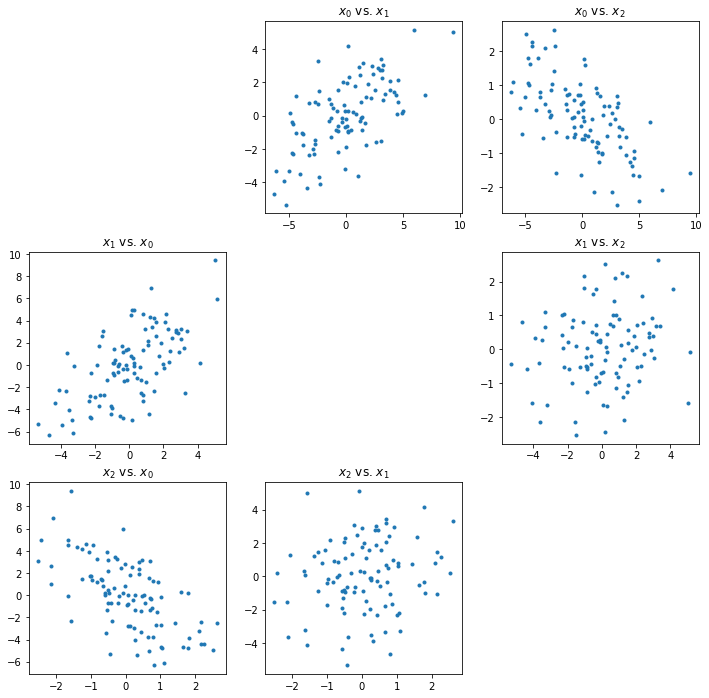

In [ ]:
#initialize parameters
N = 100
cov_matrix = [[9,4,-2],[4,4,.1],[-2,.1,1]]
mean_data = [0,0,0]

#draw N random samples from the gaussian
data = random.multivariate_normal(mean_data,cov_matrix,size=N)

#plotting each column against each other column
fig = plt.figure(figsize=(12,12))
plt.subplot(3,3,2)
plt.plot(data[:,0],data[:,1],'.')
plt.title('$x_0$ vs. $x_1$')

plt.subplot(3,3,3)
plt.plot(data[:,0],data[:,2],'.')
plt.title('$x_0$ vs. $x_2$')

plt.subplot(3,3,4)
plt.plot(data[:,1],data[:,0],'.')
plt.title('$x_1$ vs. $x_0$')

plt.subplot(3,3,6)
plt.plot(data[:,1],data[:,2],'.')
plt.title('$x_1$ vs. $x_2$')

plt.subplot(3,3,7)
plt.plot(data[:,2],data[:,0],'.')
plt.title('$x_2$ vs. $x_0$')

plt.subplot(3,3,8)
plt.plot(data[:,2],data[:,1],'.')
plt.title('$x_2$ vs. $x_1$')

plt.show()

<font color='blue'> Question #5: Calculate and print the mean and the standarde error of the mean (s.e.m. = $\sigma/\sqrt{N-1}$) for the samples you just generated.  Is your value for the $\mu$ within error of zero? (Note: to take the mean along a column of data, you need to use ```np.mean(data,axis=0)```)</font>

In [ ]:
mean = np.mean(data,axis=0)
print(mean)

sem = np.std(data, axis=0)/np.sqrt(99)
print(sem)

[-0.0076671   0.04614394  0.04811932]
[0.31540128 0.21524379 0.11069505]


<font color = "green">  Is your value for the  𝜇  within error of zero? 

Answer: Two of the three columns have means that are within error of zero. </font>

<font color='blue'> Question #6: Calculate and print the covariance matrix for the same samples as in Question #5.  How does it compate to the actual covariance matrix?</font>

In [ ]:
np.cov(data.T)

array([[ 9.94779696,  4.28260872, -2.21631118],
       [ 4.28260872,  4.63298905,  0.36087151],
       [-2.21631118,  0.36087151,  1.22533946]])

<font color = "green">  How does it compate to the actual covariance matrix? 

Answer: The values correspond to the actual covariance matrix, but the entries are more precise and include up to 8th decimal places. </font>

###Distributions of sampled covariance matrices

This, of course, is just one simulated data set.  When trying to assess how having a finite sampling size (and all data sets are of finite size!) affects our results.

The code below will calculate the means, covariances matrices, and eigenvalues (sorted from largest to smallest) for 20,000 different instantiations of the 3-D gaussian described above.  ```means``` is a 20,000 x 3 matrix of the means from each instantiation, ```cov_matrices``` is a 20,000 x 3 x 3 array of covariance matrices, and ```eigenvalues`` is a 20,000 x 3 array of eigenvalues, arranged from largest to smallest.

In [ ]:
numDataSets = 20000
N = 100
cov_matrix = [[9,4,-2],[4,4,.1],[-2,.1,1]]
mean_data = [0,0,0]

cov_matrices = np.zeros((numDataSets,3,3)) #20000x3x3 array of covariance matrices with all entries 0
means = np.zeros((numDataSets,3)) #20000x3 matrix of the means from each instantiation with all entries 0
eigenvalues = np.zeros((numDataSets,3)) #20000x3 array of eigenvalues with all entries 0
for i in range(numDataSets):
    temp_data = random.multivariate_normal(mean_data,cov_matrix,size=N) #generate a data set of 100 normally-dstributed data points in 2D
    cov_matrices[i,:,:] = np.cov(temp_data.T)
    means[i,:] = np.mean(temp_data,axis=0)
    eigvals,eigvecs = linalg.eig(cov_matrices[i,:,:])
    eigvals[::-1].sort()
    eigenvalues[i,:] = eigvals



<font color='blue'> Question #7: Using the results from the code above, make 50-bin histograms for each of the nine covariance matrix entries (you can use the same ```plt.subplot()``` code as shown above).  Do the actual values lie within the found distributions?</font>

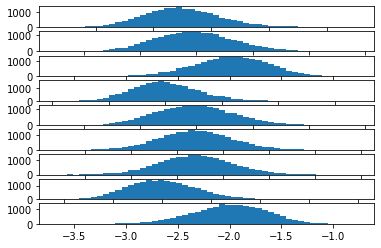

In [ ]:
#initialize parameters
N = 100
cov_matrix = [[9,4,-2],[4,4,.1],[-2,.1,1]]
mean_data = [0,0,0]

#draw N random samples from the gaussian
data = random.multivariate_normal(mean_data,cov_matrix,size=N)

#plotting each column against each other column
plt.subplot(9,1,1)
plt.hist(cov_matrices[:,0,0] ,50) 
plt.subplot(9,1,2)
plt.hist(cov_matrices[:,0,1] ,50)
plt.subplot(9,1,3)
plt.hist(cov_matrices[:,0,2] ,50)
plt.subplot(9,1,4)
plt.hist(cov_matrices[:,1,1] ,50)
plt.subplot(9,1,5)
plt.hist(cov_matrices[:,1,0] ,50)
plt.subplot(9,1,6)
plt.hist(cov_matrices[:,1,2] ,50)
plt.subplot(9,1,7)
plt.hist(cov_matrices[:,2,1] ,50)
plt.subplot(9,1,8)
plt.hist(cov_matrices[:,2,2] ,50)
plt.subplot(9,1,9)
plt.hist(cov_matrices[:,2,0] ,50)

plt.show()


<font color='green'> Do the actual values lie within the found distributions?

They seem to lie within the found distributions.</font>

<font color='blue'> Question #8: Using the results from the code above, make 50-bin histograms for each of the three covariance matrix eigenvalues.  Do the distributions look gaussian, or are they asymmetric?</font>


(array([3.000e+00, 1.000e+00, 3.000e+00, 5.000e+00, 2.000e+01, 3.500e+01,
        5.700e+01, 1.110e+02, 1.620e+02, 2.330e+02, 3.170e+02, 4.630e+02,
        6.270e+02, 7.240e+02, 8.950e+02, 1.015e+03, 1.126e+03, 1.192e+03,
        1.341e+03, 1.303e+03, 1.254e+03, 1.245e+03, 1.210e+03, 1.067e+03,
        1.011e+03, 8.870e+02, 7.290e+02, 6.210e+02, 5.180e+02, 4.380e+02,
        3.430e+02, 2.530e+02, 1.950e+02, 1.480e+02, 1.360e+02, 8.100e+01,
        7.500e+01, 4.800e+01, 3.500e+01, 2.200e+01, 1.500e+01, 1.200e+01,
        8.000e+00, 3.000e+00, 6.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.0420413 , 0.04394252, 0.04584373, 0.04774495, 0.04964617,
        0.05154738, 0.0534486 , 0.05534982, 0.05725103, 0.05915225,
        0.06105346, 0.06295468, 0.0648559 , 0.06675711, 0.06865833,
        0.07055955, 0.07246076, 0.07436198, 0.0762632 , 0.07816441,
        0.08006563, 0.08196685, 0.08386806, 0.08576928, 0.0876705 ,
        0.08957171, 0.09147293, 0.09

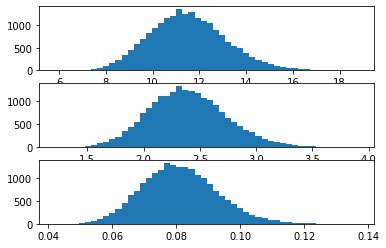

In [ ]:
plt.subplot(3,1,1)
plt.hist(eigenvalues[:,0] ,50)
plt.subplot(3,1,2)
plt.hist(eigenvalues[:,1] ,50)
plt.subplot(3,1,3)
plt.hist(eigenvalues[:,2] ,50)


<font color='green'> Do the distributions look gaussian, or are they asymmetric? 

Answer: they look gaussian. </font>

###Assessing statistical significance for eigenvalues

One way of performing *dimensionality reduction* (i.e., translating a high-dimensional representation into a lower-dimensional one) is to project a data set onto the space of eigenvectors corresponding to eigenvalues that are "significantly" different from zero.  Below, we will see one way of performing this assessment via independently shuffling the columns of a data matrix.

(Editorial note: I put "significantly" in scare quotes here, as I don't really like the term -- it's really just a way to pretend that an arbitrary threshold is really a magic value that delineates success from failure.  OK, Rant over.  For now.)

Let's go back again to our 3-D gaussian matrix from before.

In [ ]:
#initialize parameters
N = 100
cov_matrix = [[9,4,-2],[4,4,.1],[-2,.1,1]]
mean_data = [0,0,0]

#draw N random samples from the gaussian
data = random.multivariate_normal(mean_data,cov_matrix,size=N)
print(data)

[[-4.02143298e+00 -2.89439492e+00  2.48707394e-02]
 [-2.56059746e+00  5.01035098e-01  1.39622037e+00]
 [ 1.65486937e-01 -1.83160311e-01  8.47603346e-02]
 [ 2.62476953e+00  4.53399536e-01 -1.49428775e+00]
 [-3.20837009e+00 -1.50446003e+00  6.40396503e-01]
 [-5.43482545e-01 -6.34966496e-01 -1.92602298e-01]
 [ 4.87603634e+00  3.95130240e+00 -5.96771516e-01]
 [-4.87831389e+00 -4.23698383e+00  3.21695223e-01]
 [ 3.05022232e+00  9.29723037e-01 -1.22321684e+00]
 [-3.74227861e+00 -3.39152345e-01  1.93167335e+00]
 [ 3.89455113e+00  1.15178160e+00 -6.96507544e-01]
 [-1.17132914e+00  4.52577635e-01  1.19133417e+00]
 [-1.69037189e+00  5.07495187e-01  1.31377442e+00]
 [ 5.53178483e-01  1.86414004e-01 -8.84310672e-01]
 [ 1.35591649e+00 -1.09687697e+00 -6.66647053e-01]
 [-3.56432637e+00 -1.48788606e+00  1.10128889e+00]
 [ 1.01691398e+00 -9.46102635e-01 -6.64231720e-01]
 [-1.73003259e+00 -1.83531455e+00  1.46999143e-01]
 [-7.57981660e-01 -2.12231999e+00 -3.05231766e-01]
 [ 1.93964404e+00  6.11890597e-

Because the covariance matrix has off-diagonal terms, the are correlations between the three measured variables.  A natural question to ask, though, is: *if there were no correlations, might we still see some by accident just because we've only measured a finite number of data points?*

One way to answer this question is to shuffle each of the columns independently from one another.  Thus, the resulting matrix **should** have no correlations, but, of course, will display some correlations due to noise from finite sampling.  We then will measure the resulting eigenvalues from these shuffled matrices, repeat the process multiple times, and will compare the resulting distribution of eigenvalues from shuffled matrices to the eigenvalues from the measured samples.

First, to shuffle the columns in the matrix, we can use the following code:

In [ ]:
shuffled_data = np.copy(data)
#note: we can't say "shuffled_data = data" like in matlab or R, because then, 
#the created variable would be linked to the old variable
for i in range(3): #dimension is 3
  random.shuffle(shuffled_data[:,i])

<font color='blue'> Question #9: Calculate the covariance matrix eigenvalues (sorted from largest to smallest) from the ```data``` matrix above.</font>


In [ ]:

for i in range(3):
    cov_matrices[i,:,:] = np.cov(data.T)
    eigvals,eigvecs = linalg.eig(cov_matrices[i,:,:])
    eigvals[::-1].sort() #sorting
    eigenvalues[i,:] = eigvals

print(eigvals)

[10.6004027   2.40186363  0.08037534]


<font color='blue'> Question #10: Perform the shuffling analysis described in the paragraph above on the ```data``` matrix (perform the shuffling 1,000 times.  Create 50-bin histograms for the each of the three eigenvalues (remember to sort!). </font>


(array([ 1.,  1.,  1.,  0.,  2.,  0.,  0.,  1.,  1.,  1.,  2.,  0.,  2.,
         1.,  0.,  8.,  3.,  0.,  1.,  4.,  1.,  4.,  5.,  7.,  5.,  3.,
         8.,  7., 13.,  6., 11., 18., 25., 26., 30., 25., 25., 33., 34.,
        24., 34., 56., 46., 59., 47., 65., 84., 81., 95., 94.]),
 array([0.8917836 , 0.89464661, 0.89750962, 0.90037262, 0.90323563,
        0.90609864, 0.90896165, 0.91182466, 0.91468767, 0.91755068,
        0.92041369, 0.9232767 , 0.92613971, 0.92900271, 0.93186572,
        0.93472873, 0.93759174, 0.94045475, 0.94331776, 0.94618077,
        0.94904378, 0.95190679, 0.9547698 , 0.9576328 , 0.96049581,
        0.96335882, 0.96622183, 0.96908484, 0.97194785, 0.97481086,
        0.97767387, 0.98053688, 0.98339989, 0.9862629 , 0.9891259 ,
        0.99198891, 0.99485192, 0.99771493, 1.00057794, 1.00344095,
        1.00630396, 1.00916697, 1.01202998, 1.01489299, 1.01775599,
        1.020619  , 1.02348201, 1.02634502, 1.02920803, 1.03207104,
        1.03493405]),
 <a list of 50

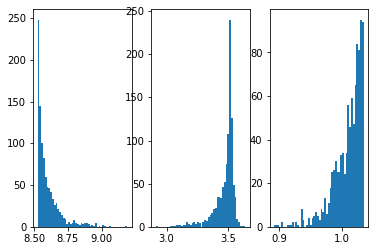

In [ ]:
shuffled_data = np.copy(data)

eigs = np.zeros((1000,3))

for i in range(1000):
  for j in range(3):
    random.shuffle(shuffled_data[:,j])
  cov_matrices[j,:,:] = np.cov(shuffled_data.T)
  eigvals,eigvecs = linalg.eig(cov_matrices[j,:,:])
  eigvals[::-1].sort() #sorting
  eigs[i,:] = eigvals

plt.subplot(1,3,1)
plt.hist(eigs[:,0] ,50)

plt.subplot(1,3,2)
plt.hist(eigs[:,1] ,50)

plt.subplot(1,3,3)
plt.hist(eigs[:,2] ,50)




<font color='blue'> Question #11: In the histograms above, are the resulting distributions symmetric or non-symmetric?  If the latter, is there a more definitive upper-bound or a more definitive lower-bound?</font>


<font color='green'> Answer: All three histograms are non-symmetric. The first histogram has a more definitive lower bound which seems to be around 9.5 and the third histogram has a more definitive upper bound that looks like it's around 1.0. I can't really tell for the middle histogram but it seems to have a more definitive upper bound aroung 4.5 compared to the lower bound.  </font>

<font color='blue'> Question #12: Given your answers to Questions #9, 10, and 11, which of the three eigenvalues that you've measured from ```data``` would you consider as "signficant" ? Explain your reasoning.</font>


<font color='green'> 

Answer: Out of the three eigenvalues, 8.72 could be considered as significant. When creating a covariance matrix and computing eigenvalues and eigenvectors during principal component analysis of high-dimensional data, it is critical to retain as much information as possible while successfully reducing the dimentionality. This is done by capturing the maximum amount of variance. After sorting the three eigenvalues in descending order, the first component accounts for the largest variance, which is 8.72 in our case.   </font>
